In [18]:
import scanpy as sc
from pathlib import Path
import pandas as pd
import os
import numpy as np
import anndata as ad
from tqdm import tqdm
import matplotlib.pyplot as plt
# from jax.config import config
# config.update("jax_enable_x64", True)

from joblib import Parallel, delayed
import squidpy as sq
import scanpy as sc
from anndata import AnnData
from scipy.sparse import csr_matrix

%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
import scvelo as scv
adata = scv.datasets.gastrulation()

In [20]:
adata[(adata.obs['stage'] == 'E8.5') ].obs["sample"].value_counts()

sample
29    6166
36    3585
17    3570
37    3040
Name: count, dtype: int64

In [33]:
sc.pp.filter_genes(adata, min_counts=2)
sc.pp.filter_cells(adata, min_counts=2)
adata_E85 = adata[(adata.obs['stage'] == 'E8.5') & (adata.obs["sequencing.batch"] == 3) & (adata.obs["sample"].isin([36, 37]))].copy()
sc.pp.highly_variable_genes(adata_E85, n_top_genes=2000, flavor='seurat_v3', batch_key="sample")
sc.pp.normalize_total(adata_E85, target_sum=1e4)
sc.pp.log1p(adata_E85)
sc.pp.pca(adata_E85)
sc.pp.neighbors(adata_E85)
sc.tl.umap(adata_E85)

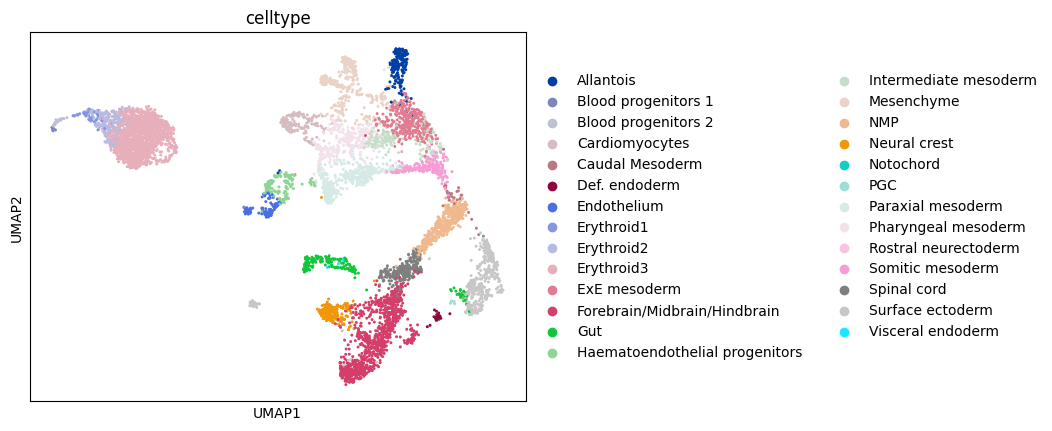

In [34]:
# sc.pl.umap(adata_E85, color=['celltype',"sample", "sequencing.batch", "cluster.stage"])
sc.pl.umap(adata_E85, color=['celltype'])

In [35]:
adata_E85

AnnData object with n_obs × n_vars = 6625 × 18132
    obs: 'barcode', 'sample', 'stage', 'sequencing.batch', 'theiler', 'doub.density', 'doublet', 'cluster', 'cluster.sub', 'cluster.stage', 'cluster.theiler', 'stripped', 'celltype', 'colour', 'umapX', 'umapY', 'haem_gephiX', 'haem_gephiY', 'haem_subclust', 'endo_gephiX', 'endo_gephiY', 'endo_trajectoryName', 'endo_trajectoryDPT', 'endo_gutX', 'endo_gutY', 'endo_gutDPT', 'endo_gutCluster', 'cell_velocyto_loom', 'n_counts'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'n_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'highly_variable_nbatches'
    uns: 'hvg', 'log1p', 'pca', 'neighbors', 'umap', 'celltype_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'spliced', 'unspliced'
    obsp: 'distances', 'connectivities'

In [36]:
adata_E85.write_h5ad(f"/lustre/groups/ml01/workspace/giovanni.palla/moscot/mapping/mouse_embryo/mouse_embryo_sc.h5ad")

In [26]:
adata_sp = ad.read_h5ad("/lustre/groups/ml01/workspace/giovanni.palla/moscot/mapping/mouse_embryo/mouse_embryo_spatial_1.h5ad")

In [29]:
adata = adata_E85

In [30]:
len(set(adata[:,adata.var.highly_variable].var_names).intersection(set(adata_sp.var_names)))

287

In [32]:
adata_sp.shape

(19451, 351)